In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pandas.io.json import json_normalize
from wordcloud import WordCloud, STOPWORDS
import ast

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('ted_main.csv')
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [ ]:
df['related_talks'] = df['related_talks'].apply(lambda x: ast.literal_eval(x))


In [ ]:
s = df.apply(lambda x: pd.Series(x['related_talks']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'related'

In [ ]:
related_df = df.drop('related_talks', axis=1).join(s)
related_df['related'] = related_df['related'].apply(lambda x: x['title'])

In [ ]:
d = dict(related_df['title'].drop_duplicates())
d = {v: k for k, v in d.items()}

In [ ]:
related_df['title'] = related_df['title'].apply(lambda x: d[x])
related_df['related'] = related_df['related'].apply(lambda x: d[x])

In [ ]:
related_df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,speaker_occupation,tags,title,url,views,related
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",0,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,692
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",0,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,1502
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",0,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,1991
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",0,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,715
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",0,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,1023


In [ ]:
related_df = related_df[['title', 'related']]
related_df.head()

,title,related
0,0,692
0,0,1502
0,0,1991
0,0,715
0,0,1023


In [ ]:
edges = list(zip(related_df['title'], related_df['related']))

In [ ]:
import networkx as nx
G = nx.Graph()
G.add_edges_from(edges)

In [ ]:
d = dict(G.degree)

{0: 30,
 692: 11,
 1502: 10,
 1991: 10,
 715: 9,
 1023: 12,
 2316: 14,
 1: 18,
 214: 13,
 450: 8,
 1825: 7,
 2453: 13,
 2058: 15,
 2051: 17,
 2: 10,
 1488: 6,
 1989: 10,
 145: 15,
 2359: 8,
 370: 13,
 1340: 10,
 3: 23,
 836: 10,
 1644: 14,
 1817: 11,
 2535: 13,
 2514: 14,
 2513: 15,
 4: 23,
 1797: 9,
 2028: 12,
 502: 10,
 784: 9,
 117: 12,
 726: 10,
 5: 12,
 201: 19,
 47: 16,
 29: 34,
 888: 6,
 2537: 17,
 1996: 8,
 6: 14,
 43: 21,
 8: 8,
 685: 9,
 95: 7,
 9: 14,
 260: 8,
 7: 13,
 603: 7,
 1829: 12,
 1932: 18,
 305: 15,
 202: 15,
 74: 21,
 1767: 11,
 204: 17,
 96: 9,
 261: 11,
 1114: 9,
 326: 10,
 10: 15,
 1511: 11,
 524: 19,
 2281: 8,
 231: 18,
 11: 19,
 1962: 8,
 1259: 15,
 643: 8,
 340: 16,
 136: 12,
 255: 12,
 12: 13,
 943: 12,
 695: 11,
 1658: 9,
 438: 12,
 162: 9,
 1923: 9,
 13: 8,
 553: 15,
 698: 16,
 1730: 7,
 2135: 12,
 226: 9,
 200: 14,
 14: 8,
 1783: 8,
 223: 6,
 1445: 11,
 247: 11,
 358: 6,
 15: 15,
 2000: 16,
 1971: 10,
 946: 11,
 648: 10,
 1224: 24,
 1775: 12,
 16: 15,
 18

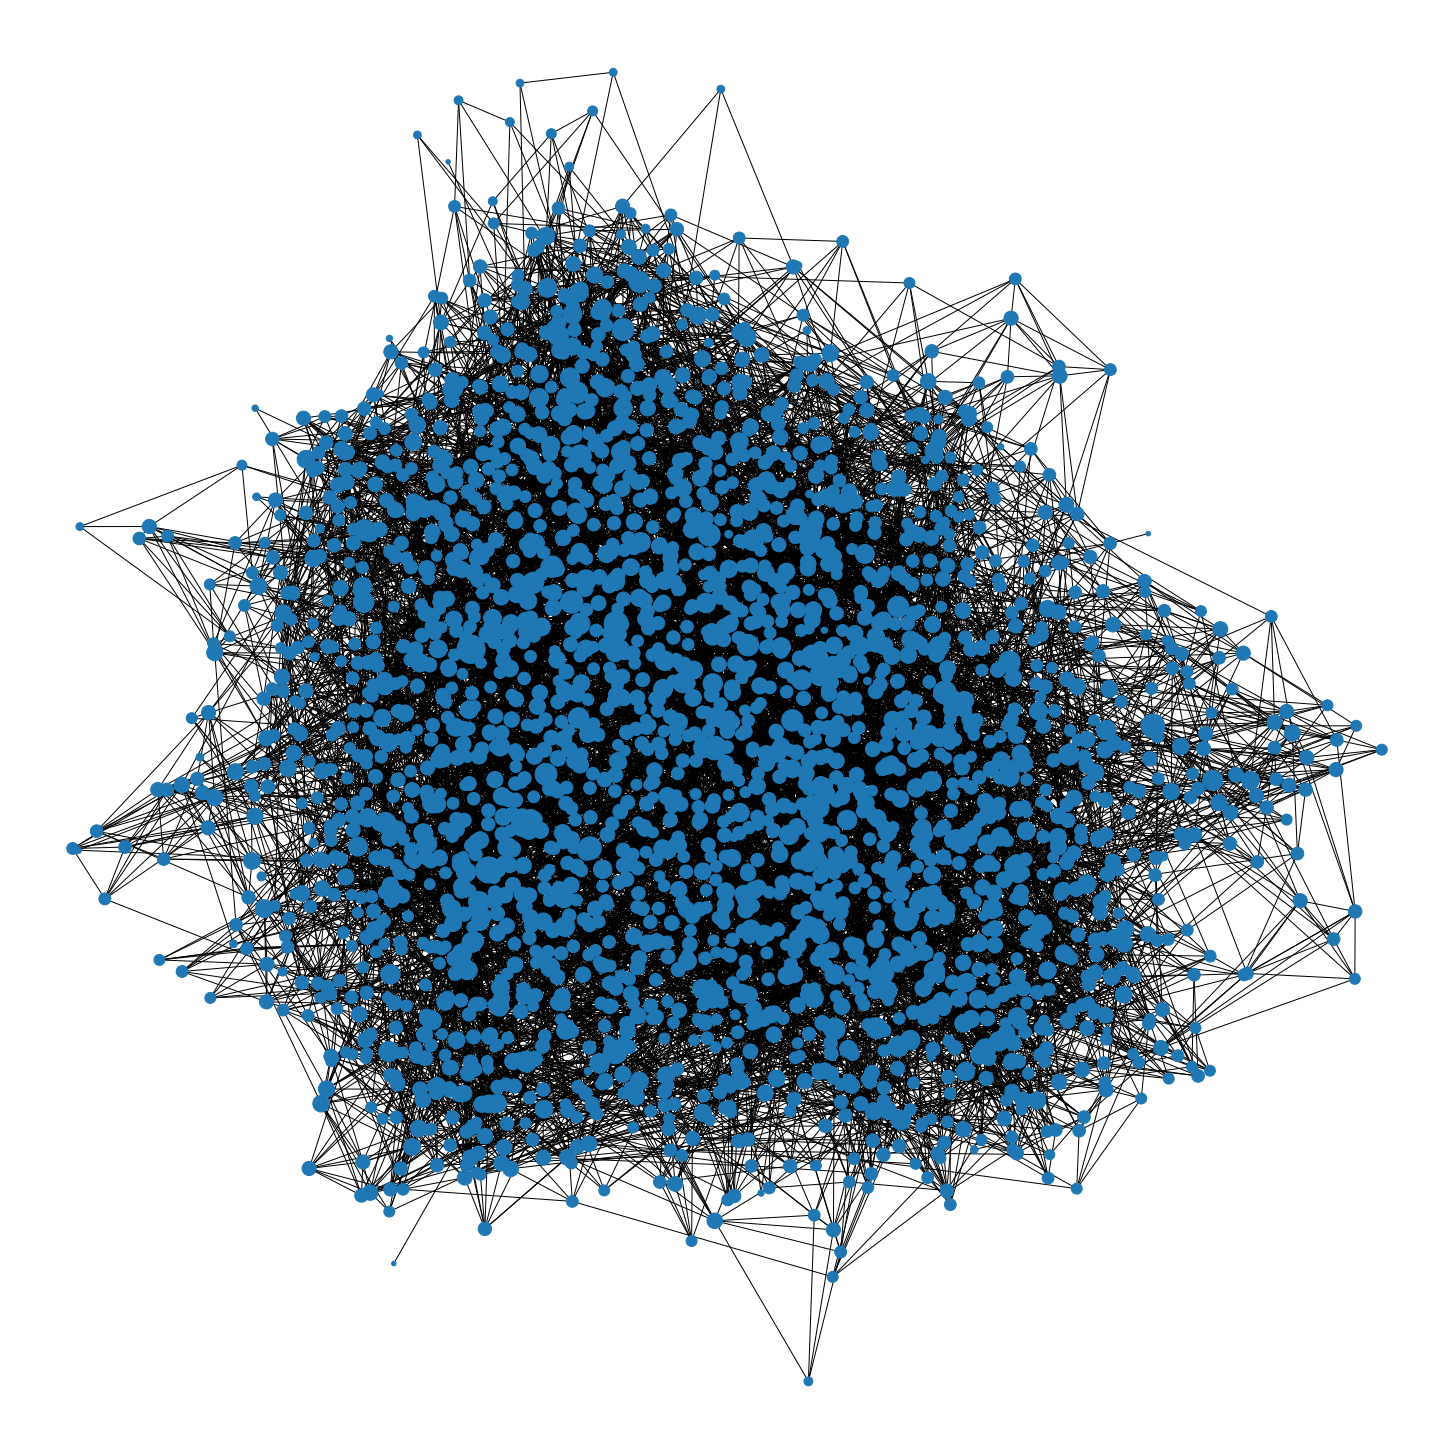

In [ ]:
plt.figure(figsize=(20, 20))
nx.draw(G, nodelist=d.keys(), node_size=[v*20 for v in d.values()])
plt.show()

In [ ]:
highest_degree_node = max(G.nodes, key=G.degree)
highest_degree_node

2471

In [ ]:
G.degree(highest_degree_node)

40